# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up lists to hold response info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    # If the city does not have the data requested, then skip it
    try:
        print(f"Processing record {i+1} of {len(cities)} | {cities[i]}")
    
    
        settings = {"units": "metric", "appid": api_key}
        current_weather = owm.get_current(cities[i], **settings)

        City.append(cities[i])
        Cloudiness.append(current_weather["clouds"]["all"])
        Country.append(countries[i])
        Date.append(current_weather["dt"])
        Humidity.append(current_weather["main"]["humidity"])
        Lat.append(current_weather["coord"]["lat"])
        Lng.append(current_weather["coord"]["lon"])
        MaxTemp.append(current_weather["main"]["temp_max"])
        WindSpeed.append(current_weather["wind"]["speed"])
           
    except:
        print("City not found. Skipping...")
        

Processing record 1 of 603 | general roca
Processing record 2 of 603 | caloundra
Processing record 3 of 603 | bluff
Processing record 4 of 603 | puerto ayora
Processing record 5 of 603 | banmo
City not found. Skipping...
Processing record 6 of 603 | grindavik
Processing record 7 of 603 | chaman
Processing record 8 of 603 | asau
City not found. Skipping...
Processing record 9 of 603 | namibe
Processing record 10 of 603 | albany
Processing record 11 of 603 | bonavista
Processing record 12 of 603 | yellowknife
Processing record 13 of 603 | hobart
Processing record 14 of 603 | sitka
Processing record 15 of 603 | nikolskoye
Processing record 16 of 603 | mataura
Processing record 17 of 603 | taolanaro
City not found. Skipping...
Processing record 18 of 603 | qaanaaq
Processing record 19 of 603 | honiara
Processing record 20 of 603 | paamiut
Processing record 21 of 603 | broome
Processing record 22 of 603 | rikitea
Processing record 23 of 603 | butaritari
Processing record 24 of 603 | pevek
P

Processing record 191 of 603 | saldanha
Processing record 192 of 603 | hachinohe
Processing record 193 of 603 | rawson
Processing record 194 of 603 | barentsburg
City not found. Skipping...
Processing record 195 of 603 | pangnirtung
Processing record 196 of 603 | suntar
Processing record 197 of 603 | marawi
Processing record 198 of 603 | ukiah
Processing record 199 of 603 | constitucion
Processing record 200 of 603 | ak-dovurak
Processing record 201 of 603 | port blair
Processing record 202 of 603 | dingle
Processing record 203 of 603 | samusu
City not found. Skipping...
Processing record 204 of 603 | denpasar
Processing record 205 of 603 | hihifo
City not found. Skipping...
Processing record 206 of 603 | longyearbyen
Processing record 207 of 603 | atasu
Processing record 208 of 603 | prata
Processing record 209 of 603 | george
Processing record 210 of 603 | yinchuan
Processing record 211 of 603 | cidreira
Processing record 212 of 603 | luwuk
Processing record 213 of 603 | goderich
Pro

Processing record 383 of 603 | port hardy
Processing record 384 of 603 | lichinga
Processing record 385 of 603 | north bend
Processing record 386 of 603 | san rafael
Processing record 387 of 603 | gull lake
Processing record 388 of 603 | tumen
Processing record 389 of 603 | istok
Processing record 390 of 603 | ayan
Processing record 391 of 603 | vaitupu
City not found. Skipping...
Processing record 392 of 603 | severnyy
City not found. Skipping...
Processing record 393 of 603 | arraial do cabo
Processing record 394 of 603 | daye
Processing record 395 of 603 | asyut
Processing record 396 of 603 | phumi samraong
City not found. Skipping...
Processing record 397 of 603 | adre
Processing record 398 of 603 | shingu
Processing record 399 of 603 | belyy yar
Processing record 400 of 603 | challans
Processing record 401 of 603 | nyurba
Processing record 402 of 603 | sabya
Processing record 403 of 603 | lappeenranta
Processing record 404 of 603 | lompoc
Processing record 405 of 603 | lebedinyy
P

Processing record 573 of 603 | inuvik
Processing record 574 of 603 | coihaique
Processing record 575 of 603 | kalmunai
Processing record 576 of 603 | raudeberg
Processing record 577 of 603 | rio gallegos
Processing record 578 of 603 | saint-joseph
Processing record 579 of 603 | itapeva
Processing record 580 of 603 | haliyal
Processing record 581 of 603 | sur
Processing record 582 of 603 | cuenca
Processing record 583 of 603 | stolin
Processing record 584 of 603 | camacha
Processing record 585 of 603 | ambon
Processing record 586 of 603 | siano
Processing record 587 of 603 | mago
Processing record 588 of 603 | roebourne
Processing record 589 of 603 | keti bandar
Processing record 590 of 603 | lapeer
Processing record 591 of 603 | brande
Processing record 592 of 603 | paka
Processing record 593 of 603 | sibolga
Processing record 594 of 603 | bodden town
Processing record 595 of 603 | ust-kuyga
Processing record 596 of 603 | gander
Processing record 597 of 603 | faya
Processing record 598

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictionary from the lists
weatherpy_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
}

# Create a DataFrame
weatherpy_df = pd.DataFrame(weatherpy_dict)

# Save as a csv
weatherpy_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

# Display the DataFrame
weatherpy_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,general roca,0,ar,1550944800,22,-39.03,-67.58,27.00,5.10
1,caloundra,40,au,1550944800,68,-26.80,153.14,21.00,4.60
2,bluff,8,nz,1550946993,83,-23.58,149.07,20.31,1.62
3,puerto ayora,75,ec,1550944800,58,-0.74,-90.35,31.00,4.10
4,grindavik,75,is,1550944800,86,63.84,-22.43,5.00,11.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

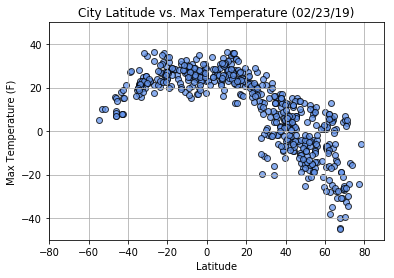

In [8]:
# Incorporate the other graph properties
plt.grid()
plt.xlim(-80,90)
plt.ylim(-50,50)
plt.title("City Latitude vs. Max Temperature (02/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Build the scatter plot
plt.scatter(Lat, MaxTemp, marker="o", facecolors="cornflowerblue", edgecolors="black",
            alpha=0.75, label='x', linewidth = 1)

# Save figure and show plot
plt.savefig("latvstemp_plot.png")
plt.show()


#### Latitude vs. Humidity Plot

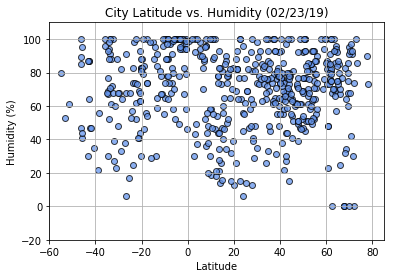

In [9]:
# Incorporate the other graph properties
plt.grid()
plt.xlim(-60,85)
plt.ylim(-20,110)
plt.title("City Latitude vs. Humidity (02/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Build the scatter plot
plt.scatter(Lat, Humidity, marker="o", facecolors="cornflowerblue", edgecolors="black",
            alpha=0.75, label='x', linewidth = 1)

# Save figure and show plot
plt.savefig("latvshumidity_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

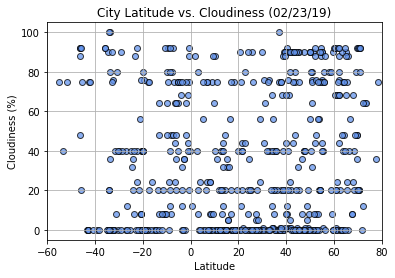

In [10]:
# Incorporate the other graph properties
plt.grid()
plt.xlim(-60,80)
plt.ylim(-5,105)
plt.title("City Latitude vs. Cloudiness (02/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Build the scatter plot
plt.scatter(Lat, Cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black",
            alpha=0.75, label='x', linewidth = 1)

# Save figure and show plot
plt.savefig("latvscloudiness_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

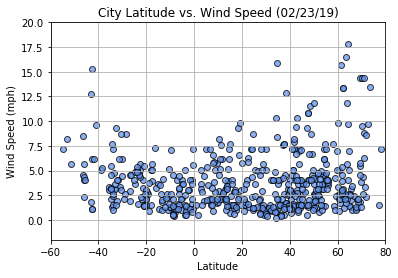

In [11]:
# Incorporate the other graph properties
plt.grid()
plt.xlim(-60,80)
plt.ylim(-2,20)
plt.title("City Latitude vs. Wind Speed (02/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Build the scatter plot
plt.scatter(Lat, WindSpeed, marker="o", facecolors="cornflowerblue", edgecolors="black",
            alpha=0.75, label='x', linewidth = 1)

# Save figure and show plot
plt.savefig("latvswindspeed_plot.png")
plt.show()